In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_height = 28
img_width = 28
img_channel = 1

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

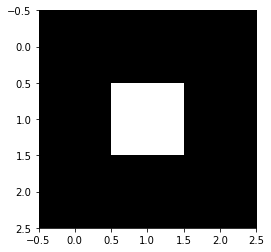

In [37]:
custom_filter_V = np.array([[-1, -1, -1], [-1, 4, -1],[-1, -1, -1]])

plt.imshow(custom_filter_V, cmap='gray')

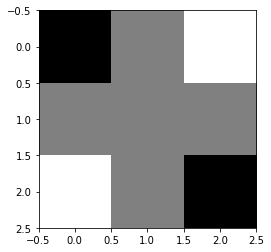

In [73]:
edge_filter = kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])

plt.imshow(edge_filter, cmap='gray')

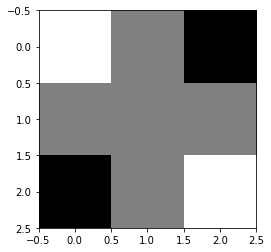

In [75]:
edge_filter2 = kernel=np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

plt.imshow(edge_filter2, cmap='gray')

In [39]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

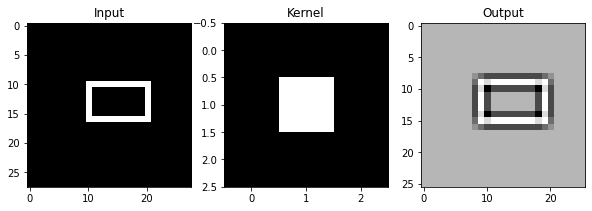

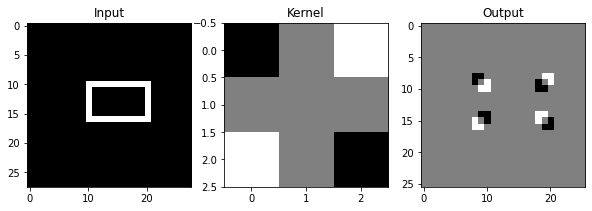

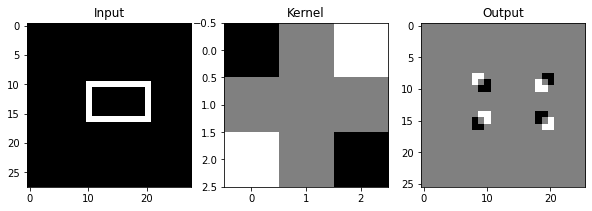

In [77]:
image = train_images[20]
image = np.zeros((28, 28))
image[10][10] = 1
image[11][10] = 1
image[12][10] = 1
image[13][10] = 1
image[14][10] = 1
image[15][10] = 1
image[16][10] = 1
image[10][20] = 1
image[11][20] = 1
image[12][20] = 1
image[13][20] = 1
image[14][20] = 1
image[15][20] = 1
image[16][20] = 1
image[10][11] = 1
image[10][12] = 1
image[10][13] = 1
image[10][14] = 1
image[10][15] = 1
image[10][16] = 1
image[10][17] = 1
image[10][18] = 1
image[10][19] = 1
image[16][11] = 1
image[16][12] = 1
image[16][13] = 1
image[16][14] = 1
image[16][15] = 1
image[16][16] = 1
image[16][17] = 1
image[16][18] = 1
image[16][19] = 1

image_filtered_V = convolve2D(image, custom_filter_V)
image_edge_filter = convolve2D(image, edge_filter)
image_edge_filter2 = convolve2D(image, edge_filter2)

fig, ax = plt.subplots(1, 3, figsize=(10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(custom_filter_V, cmap='gray')
ax[1].set_title("Kernel")
ax[2].imshow(image_filtered_V, cmap='gray')
ax[2].set_title("Output")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(edge_filter, cmap='gray')
ax[1].set_title("Kernel")
ax[2].imshow(image_edge_filter, cmap='gray')
ax[2].set_title("Output")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(edge_filter, cmap='gray')
ax[1].set_title("Kernel")
ax[2].imshow(image_edge_filter2, cmap='gray')
ax[2].set_title("Output")
plt.show()

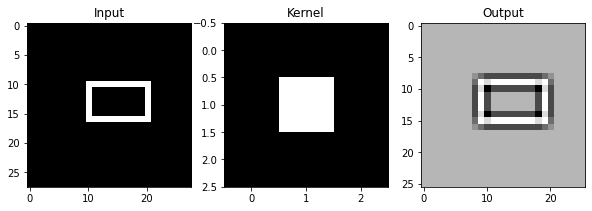

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(custom_filter_V, cmap='gray')
ax[1].set_title("Kernel")
ax[2].imshow(image_filtered_V, cmap='gray')
ax[2].set_title("Output")

import tikzplotlib
tikzplotlib.save("/Users/thomas/Nextcloud/dibse/100_Bachelorarbeit/02_Documents/03_Thesis/src/tikz/conv_examples/example1/example1.tex")